   actual_distance_to_destination  osrm_distance  distance_time_ratio  \
0                       10.435660        11.9653            -3.564340   
1                       18.936842        21.7243            -5.063158   
2                       27.637279        32.5395           -12.362721   
3                       36.118028        45.5620           -25.881972   
4                       39.386040        54.2181           -28.613960   

   segment_actual_time_sum  
0                     14.0  
1                     24.0  
2                     40.0  
3                     61.0  
4                     67.0  
Mean Squared Error: 1.8421207163183717
R-squared: 0.9999947485918953


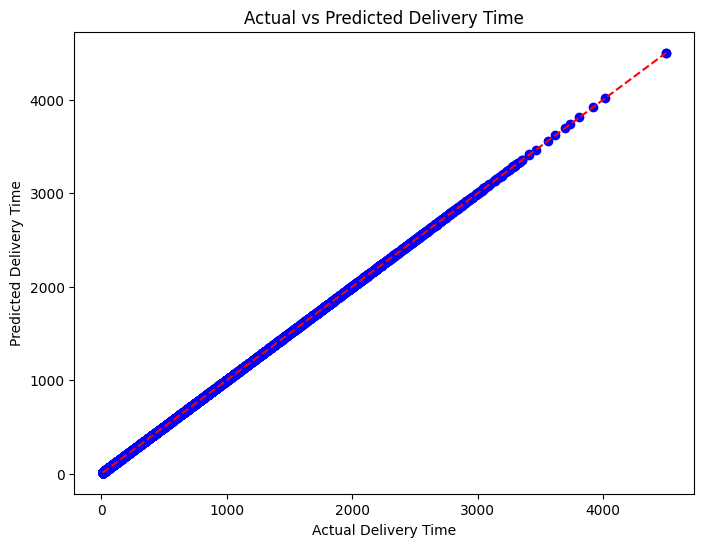

Model Coefficients:
Actual Distance to Destination Coefficient: 0.9839265235722717
OSRM Distance Coefficient: -0.0012800193900493473
Distance Time Ratio Coefficient: -0.9994011407900464


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data from a CSV file
# Replace 'your_file.csv' with the actual path to your file
data = pd.read_csv('lasso_selected_data.csv')

# Preview the data (optional)
print(data.head())

# Define the features (X) and target variable (y)
X = data[['actual_distance_to_destination', 'osrm_distance', 'distance_time_ratio']]
y = data['segment_actual_time_sum']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualize the results (Actual vs Predicted)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Delivery Time')
plt.ylabel('Predicted Delivery Time')
plt.title('Actual vs Predicted Delivery Time')
plt.show()

# Optional: Print the model's coefficients to see the impact of each feature
print('Model Coefficients:')
print(f'Actual Distance to Destination Coefficient: {model.coef_[0]}')
print(f'OSRM Distance Coefficient: {model.coef_[1]}')
print(f'Distance Time Ratio Coefficient: {model.coef_[2]}')


In [2]:
import joblib
joblib.dump(model, 'linear_regression_model.pkl')

['linear_regression_model.pkl']

In [3]:
import pandas as pd
import joblib

# Load the new test data from a CSV file
new_data = pd.read_csv('test.csv')

# Preview the data (optional)
print(new_data.head())

# Prepare the features (X) for the new data
X_new = new_data[['actual_distance_to_destination', 'osrm_distance', 'distance_time_ratio']]

# Load the saved model
loaded_model = joblib.load('linear_regression_model.pkl')

# Make predictions using the loaded model
y_new_pred = loaded_model.predict(X_new)

# Add the predictions as a new column in the new data
new_data['predicted_delivery_time'] = y_new_pred

# Display the predictions
print(new_data[['actual_distance_to_destination', 'osrm_distance', 'distance_time_ratio', 'predicted_delivery_time']])

# Optionally, save the new data with predictions to a CSV file
new_data.to_csv('predicted_new_data.csv', index=False)
print("Predictions saved to 'predicted_new_data.csv'")


   actual_distance_to_destination  osrm_distance  distance_time_ratio
0                            10.5           11.2                 0.95
1                            15.2           16.0                 1.05
2                             8.3            8.5                 1.03
3                            20.1           21.0                 0.98
4                            12.0           12.5                 1.02
   actual_distance_to_destination  osrm_distance  distance_time_ratio  \
0                            10.5           11.2                 0.95   
1                            15.2           16.0                 1.05   
2                             8.3            8.5                 1.03   
3                            20.1           21.0                 0.98   
4                            12.0           12.5                 1.02   
5                            18.5           19.2                 0.97   
6                             9.0            9.3                 1.01